---

# 文章生成AIの活用

今日は、文章生成AIで自身の研究テーマを文章化する実習を行います。

OpenAIの"gpt-4o-mini"モデルは、入力した文字列に対して、回答となる文字列を出力します。

生成AIの利用にあたっては年齢制限があります。  
この実習では、教員側で利用ログを取り、安全性に配慮しながら実施します。

---
## デモンストレーション

### 1. 単純な入力

```python
prompt = "バイオテクノロジーを勉強したいです。"
ai.ask_ai(prompt)
```

response: バイオテクノロジーを勉強するには、以下のステップを考慮してください：

1. **基礎知識を学ぶ**：生物学、化学、遺伝学の基本を理解する。
2. **専門書や教材を使用**：バイオテクノロジーに関する教科書やオンラインコースを探す。
3. **実験室経験**：大学や研究機関での実習やインターンシップを考える。
4. **最新の研究を追う**：学術雑誌やオンラインリソースで最新の研究をチェック。
5. **関連分野を探索**：医療、農業、環境など、バイオテクノロジーの応用分野を学ぶ。

興味のある特定の分野を見つけることも重要です。


### 2. 役割を与える

```python
system_prompt = """
あなたは自然科学の研究者です。
これから提示する学生の研究動機文章をもとに、指導的に考えを整理して文章を校正してください。
"""
ai.set_ai_system_role(system_prompt)

prompt = "バイオテクノロジーを勉強したいです。"
ai.ask_ai(prompt)
```

response: バイオテクノロジーを学びたいという強い意欲があります。具体的には、生命現象を理解し、それを応用して新しい技術や製品の開発に寄与したいと考えています。私の目標は、持続可能な未来のために役立つ研究を行うことです。

### 3. 制限を付与し、出力形式を指定する

```python
additional_prompt_for_system = """
ただし、userの提示する文章にない情報は追加してはいけません。
出力は、user一人称で考えを整理した<校正文>と、研究動機をブラッシュアップするために必要な<アドバイス>に分けてください。
---
<校正文>
---
<アドバイス>
"""

system_prompt_added = system_prompt + additional_prompt_for_system
ai.set_ai_system_role(system_prompt_added)

prompt = "バイオテクノロジーを勉強したいです。"
ai.ask_ai(prompt)
```

response: <校正文>
私はバイオテクノロジーを勉強したいと考えています。

<アドバイス>
具体的にどのようなバイオテクノロジーの分野に興味があるのか、またその理由や将来の目標についても考えてみると、より明確な動機になります。例えば、医療、農業、環境保護など、具体的な応用分野や自分が解決したい問題を挙げると良いでしょう。

### 4. 出力を見ながら自身の考えを整理する

```python
prompt = "私は医療応用に興味があります。風邪の特効薬を作りたいです。"
ai.ask_ai(prompt, by=-1)
```

response: <校正文>  
私は医療応用に興味があり、風邪の特効薬を開発したいと考えています。

<アドバイス>  
- 風邪に関する具体的な知識や研究背景を含めると、動機がより明確になります。  
- 特効薬に関する既存の研究や課題を調べ、その解決策として自分のアプローチを示してみましょう。  
- 具体的な方法やステップについても考えると、目標が明確になります。

--------
## 実習１


### 生成AIで自分の研究動機を文章にしてみよう。

1. `ai.reset()`で設定を初期化。
2. `ai.set_ai_system_role(system_prompt)`でシステムの役割を設定。
3. `ai.ask_ai(prompt, by=-1)`で文章を生成。

3.を繰り返して文章をブラッシュアップしていく。

* `ai.history()`でそれまでのチャット内容を閲覧できる。
* `ai.ask_ai(prompt, by=(整数))`で指定の数値からやり取りをやり直せる。（by=-1で継続。）

In [1]:
!wget -q https://www.ces-alpha.org/course/file_serve/5630822084247552/my_api_tools.py -O my_api_tools.py
from my_api_tools import MyClass

#実習当日に指定するIPアドレスを入力する
IP_address = "" 

# aiのインスタンスを作成
ai = MyClass(IP_address) 

In [ ]:
# システムの役割設定

system_prompt = "役割の指示文を入力"

# 例
# system_prompt = "あなたは自然科学の研究者です。\nこれから提示する学生の研究動機文章をもとに、指導的に考えを整理して文章を校正してください。\nただし、userの提示する文章にない情報は追加してはいけません。\n出力は、user一人称で考えを整理した<校正文>と、研究動機をブラッシュアップするために必要な<アドバイス>に分けてください。\n---\n<校正文>\n---\n<アドバイス>"
ai.set_ai_system_role(system_prompt)

In [ ]:
# 文章生成 （[Ctrl]+[Enter]で実行するとよい）

prompt = ""

# 例
# prompt = "私は数学の最適化分野に興味があります。機械学習で使用されるアルゴリズムについて研究し、速く収束し、精度の高いアルゴリズムを開発したいです。"
ai.ask_ai(prompt, by=1)

--------
# 実習２
### 生成AIで自分の研究イメージを画像にしてみよう。

1. `ai.ask_ai(prompt, image=True)`で画像を生成

OpenAI APIの仕様で（この教室クラス全体で）一分間に5枚までしか生成できません。  
エラーが返ってきたら制限に引っかかっているということなので、時間をおいてから再度試してください。

In [ ]:
prompt = "有機化学の実験中。日本人女子高校生が一人。白衣を着ている。マスクとゴーグルをつけている。意外な実験結果に驚いている。イラスト調。"
res = ai.ask_ai(prompt, image=True)

---
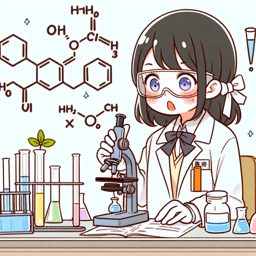

---
## 完成

私はバイオテクノロジー分野を学び、**人体の免疫力を高める物質**について研究したいと考えています。  
この分野に興味を持ったきっかけは、小学6年生の保険の授業で「風邪を治す薬はない」と聞いたことです。  
風邪は誰でも発症する身近な病気です。風邪を治す薬があったら、症状や看病のために休むことも減って、沢山の機会を失わずに済みます。  
本を読んで調べたり高校で化学と生物を学んだことで、風邪の元凶であるウィルスを退治することは簡単なことではないのだと少しずつわかってきました。  
他の方法を調べるうちに、薬による治療だけでなく、**人体の免疫力を高めることで治癒を早めるアプローチ**に興味を持つようになりました。  
まだ調べているばかりでどのようなことを学べばよいかもわかりませんが、このSTELLAプログラムを通じて知識や経験を得て、立派な研究者を目指します。  

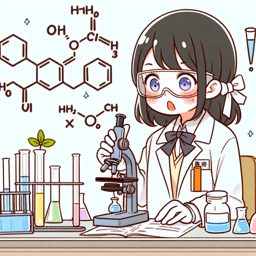